<a href="https://colab.research.google.com/github/marciogsantana/engenharia_machine_learning/blob/main/C%C3%B3pia_de_%5BIGTI%5D_MPT_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IGTI - MPT**

- Regressão
- [Prof. Matheus Mendonça](https://www.linkedin.com/in/matheusmendonca/)

In [ ]:
# importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Regressão linear no numpy**

Relembrando...

Regressão linear:

$$X\beta=y,\\\beta=\left[\begin{array}{c}a\\b\end{array}\right] .$$

Solução via minimização do erro quadrático:

$$\beta=(X^TX)^{-1}X^Ty,$$
onde $(X^TX)^{-1}X^T$ é a pseudo-inversa de $X$, facilmente calculada pelo método `np.linalg.pinv(X)`.

In [ ]:
# dados sintéticos
a, b = 2, 1  # valores originais dos coeficientes
x = np.linspace(0, 1, 10)
fx = a*x + b  # função geratriz
np.random.seed(10)
noise = np.random.normal(scale=0.15, size=x.shape)  # ruído dos dados
y = fx + noise  # dados sintéticos

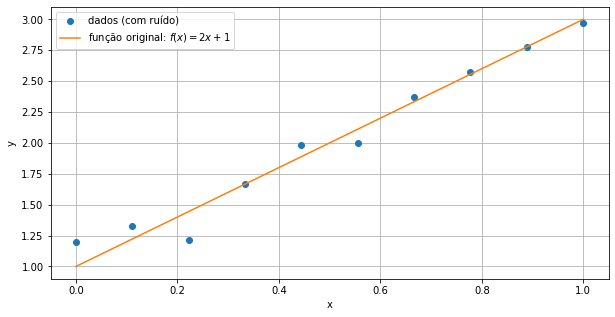

In [ ]:
# plot dos dados
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o', label='dados (com ruído)')
plt.plot(x, fx, label=f'função original: $f(x)={a}x+{b}$')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

In [ ]:
"""
Iremos estimar uma função do tipo: y = a*x + b
ou seja, devemos achar quais os valores de a e b
que melhor representam os dados.

Os valores reais de a e b são: (a, b): 2, 1
"""
# transformando vetor coluna
x, y = np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1)

# adicionando bias: para estimar o termo b
X = np.hstack((x, np.ones(x.shape)))

# estimando a e b
beta = np.linalg.pinv(X).dot(y)
print("a estimado:", beta[0][0])
print("b estimado:", beta[1][0])

a estimado: 1.911778855110616
b estimado: 1.05308181866581


In [ ]:
# predições
y_pred = X.dot(beta)

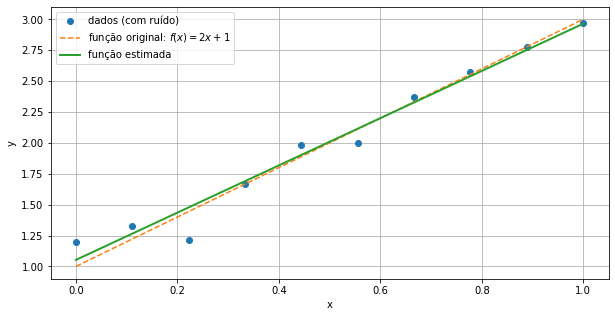

In [ ]:
# plot dos dados
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o', label='dados (com ruído)')
plt.plot(x, fx, '--', label=f'função original: $f(x)={a}x+{b}$')
plt.plot(x, y_pred, lw=2, label=f'função estimada')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

## **Regressão linear no scikit-learn**

A classe `LinearRegression` encapsula tudo que fizemos anteriormente no numpy utilizando apenas os conceitos de OLS (Ordinary Least Squares).

In [ ]:
# modelo
from sklearn.linear_model import LinearRegression

In [ ]:
# treinando o modelo: y = a*x + b, valores reais (a, b) = (2, 1)
reg = LinearRegression()
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# predições
y_pred = reg.predict(x)

In [ ]:
# coeficientes a, b estimados:
print("a estimado com LinearRegression:", reg.coef_.ravel()[0])
print("b estimado com LinearRegression:", reg.intercept_[0])

a estimado com LinearRegression: 1.9117788551106174
b estimado com LinearRegression: 1.0530818186658097


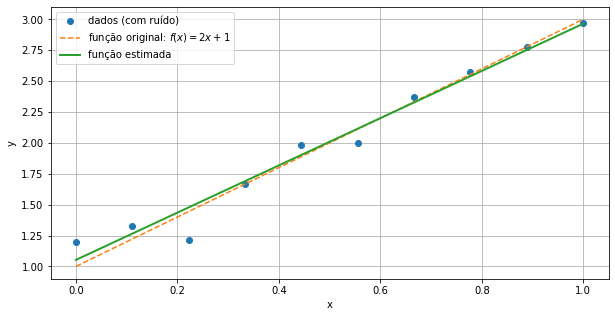

In [ ]:
# plot dos dados
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o', label='dados (com ruído)')
plt.plot(x, fx, '--', label=f'função original: $f(x)={a}x+{b}$')
plt.plot(x, y_pred, lw=2, label=f'função estimada')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

## **Avaliando um modelo de regressão**

### MSE e Coeficiente de determinação $R^2$

O erro quadrático médio de um modelo de regressão é dado por:

$$MSE_{reg} = \frac{1}{N}\sum_{i=1}^{N} (y_i - \hat{y}_i)^2.$$

O coeficiente de determinação $R^2$ representa o quão melhor um modelo é em relação a um modelo de referência que prevê sempre a média dos pontos, ou seja, o MSE do modelo de referência é dado por:

$$MSE_{ref} = \frac{1}{N}\sum_{i=1}^{N} (y_i - \bar{y})^2,$$

onde $\bar{y}$ representa a média do vetor $y$.

Sendo assim:

$$R^2 = 1 - \frac{MSE_{reg}}{MSE_{ref}}$$

In [ ]:
# score do modelo   este é R2
score = reg.score(x, y)
print("score:", score)

score: 0.9689467401989461


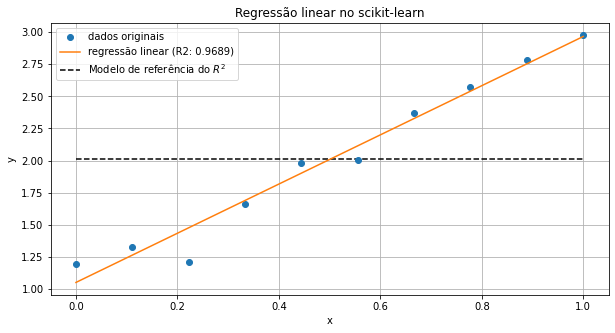

In [ ]:
# plot dos dados
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o', label='dados originais')
plt.plot(x, y_pred, label='regressão linear (R2: {:.4f})'.format(score))
plt.hlines(y=y.mean(), xmin=x.min(), xmax=x.max(), linestyle='dashed',    # media dos dados
           label='Modelo de referência do $R^2$')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regressão linear no scikit-learn")
plt.grid()
plt.show()

In [ ]:
# função para cálculo do MSE
def mse(y_true, y_pred, is_ref = False):

  # mse modelo
  if is_ref:
    mse = ((y_true - y_true.mean())**2).mean()
  else:
    mse = ((y_true - y_pred)**2).mean()

  return mse

In [ ]:
# função para cálculo do coeficiente de determinação R2
def r2(mse_reg, mse_ref):
  return 1 - mse_reg/mse_ref

In [ ]:
# calculando o mse dos modelos
mse_reg = mse(y_true=y, y_pred=y_pred)
print("MSE do modelo de regressão:", mse_reg)
mse_ref = mse(y_true=y, y_pred=y_pred, is_ref=True)
print("MSE do modelo de referência:", mse_ref)

MSE do modelo de regressão: 0.011930304493574708
MSE do modelo de referência: 0.3841884739318032


In [ ]:
# calculando o R2 score
r2_score = r2(mse_reg=mse_reg, mse_ref=mse_ref)
print("Coeficiente R2 do modelo implementado (calculado):", r2_score)
print("Coeficiente R2 do modelo implementado (scikit-learn):", score)

Coeficiente R2 do modelo implementado (calculado): 0.9689467401989461
Coeficiente R2 do modelo implementado (scikit-learn): 0.9689467401989461


### Validação de modelos


In [ ]:
# dados sintéticos
x = np.linspace(-1, 1, 50)
fx = 2*x + 1  # função geratriz
np.random.seed(10)
noise = np.random.normal(scale=0.5, size=x.shape)  # ruído dos dados
y = fx + noise  # dados sintéticos

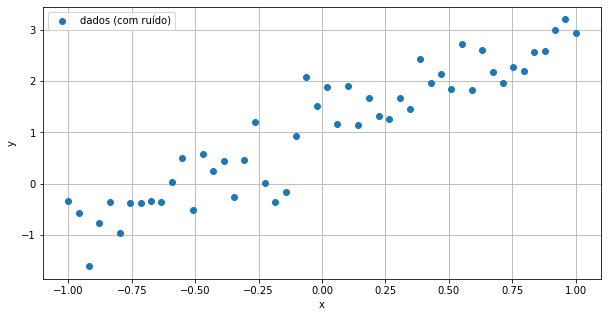

In [ ]:
# plot dos dados
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o', label='dados (com ruído)')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

#### Hold-out

In [ ]:
# transformando para vetor coluna
X, y = np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1)

In [ ]:
# divisão em treino/teste
from sklearn.model_selection import train_test_split

In [ ]:
# divisão em treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=1/3,
                                                    random_state=0)

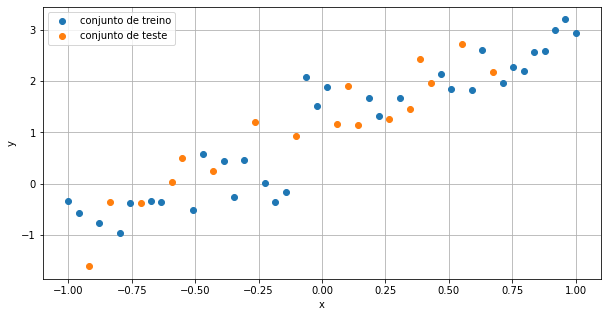

In [ ]:
# plot dos dados
plt.figure(figsize=(10, 5))
plt.plot(X_train, y_train, 'o', label='conjunto de treino')
plt.plot(X_test, y_test, 'o', label='conjunto de teste')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

In [ ]:
# treinando o modelo
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# predição no teste
y_pred = reg.predict(X_test)  # previsao 
y_pred_train = reg.predict(X_train)  # apenas teste usando o treino não é usado em produção

In [ ]:
# MSE
from sklearn.metrics import mean_squared_error

In [ ]:
# MSE regressão
mse_train = mean_squared_error(y_true=y_train, y_pred=y_pred_train)
mse_test = mean_squared_error(y_true=y_test, y_pred=y_pred)
print("MSE treino:", mse_train)
print("MSE teste:", mse_test)

MSE treino: 0.21241332573416802
MSE teste: 0.1905413706674759


In [ ]:
# score no treino e no teste
score_train = reg.score(X_train, y_train)
score_test = reg.score(X_test, y_test)
print("R2 treino:", score_train)
print("R2 teste:", score_test)

R2 treino: 0.8727502321388257
R2 teste: 0.8442929391427019


Quando temos valores proximos de treino e teste é um bom sinal

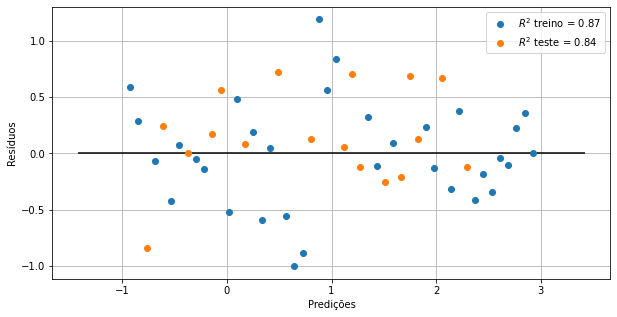

In [ ]:
# plot dos resíduos
plt.figure(figsize=(10, 5))
plt.plot(y_pred_train, y_train-y_pred_train,
         'o', label='$R^2$ treino = {:.2f}'.format(score_train))
plt.plot(y_pred, y_test-y_pred,
         'o', label='$R^2$ teste = {:.2f}'.format(score_test))
plt.hlines(y=0, xmin=y_pred_train.min()-0.5, xmax=y_pred_train.max()+0.5)
plt.legend()
plt.xlabel("Predições")
plt.ylabel("Resíduos")
plt.grid()
plt.show()

## **Regressão em problemas não lineares**

In [ ]:
# dados sintéticos
x = np.linspace(-np.pi, np.pi, 100)
fx = np.sin(x)  # função geratriz
np.random.seed(10)
noise = np.random.normal(scale=0.2, size=x.shape)  # ruído dos dados
y = fx + noise  # dados sintéticos

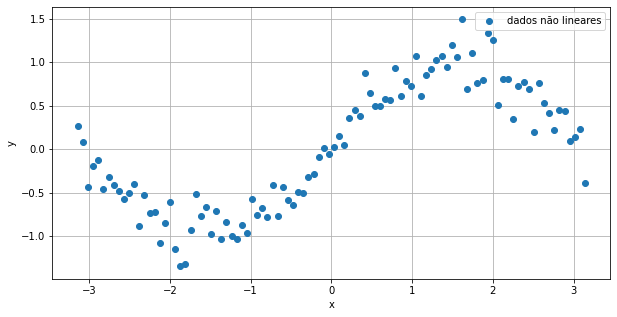

In [ ]:
# plot dos dados
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o', label='dados não lineares')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

In [ ]:
# transformando para vetor coluna
x, y = np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1)

In [ ]:
# transformação polinomial: transformação das features e utilização do mesmo
# modelo linear

def polynomial_features(x, d=2):
  # X = [x**1, ..., x**d]
  X = np.hstack([x**i for i in range(1, d+1)])  

  return X

In [ ]:
# gerando as features polinomiais
d = 3
X = polynomial_features(x, d=d)
print("Dimensão de X:", X.shape)

Dimensão de X: (100, 3)


In [ ]:
# divisão em treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=1/3,
                                                    random_state=0)

In [ ]:
# treinando o modelo
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# predição no teste
y_pred = reg.predict(X_test)
y_pred_train = reg.predict(X_train)

In [ ]:
# MSE regressão
mse_train = mean_squared_error(y_true=y_train, y_pred=y_pred_train)
mse_test = mean_squared_error(y_true=y_test, y_pred=y_pred)
print("MSE treino:", mse_train)
print("MSE teste:", mse_test)

MSE treino: 0.039276055990699506
MSE teste: 0.04693083809574153


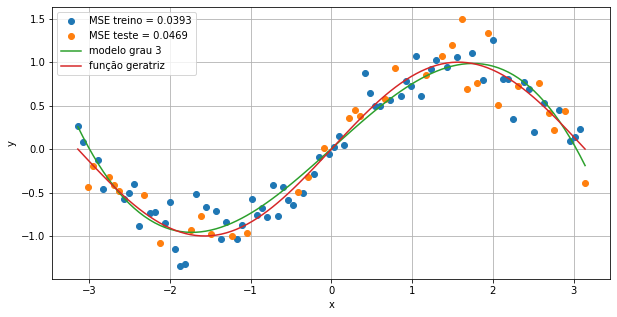

In [ ]:
# visualização da predição
x_grid = np.linspace(-np.pi, np.pi, 100).reshape(-1, 1)  # aumenta a resolução
y_pred_grid = reg.predict(polynomial_features(x_grid, d=d)) 
plt.figure(figsize=(10, 5))
plt.plot(X_train[:, 0], y_train, 'o',
         label='MSE treino = {:.4f}'.format(mse_train))
plt.plot(X_test[:, 0], y_test, 'o',
         label='MSE teste = {:.4f}'.format(mse_test))
plt.plot(x_grid, y_pred_grid, label=f'modelo grau {d}')
plt.plot(x_grid, np.sin(x_grid), label='função geratriz')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

## **Redes Neurais Artificiais**

In [ ]:
# MLP aplicado à regressão
from sklearn.neural_network import MLPRegressor

In [ ]:
MLPRegressor?

In [ ]:
# instanciando a rede neural
n = 2  # número de neurônios na camada escondida
mlp = MLPRegressor(hidden_layer_sizes=(n,),
                   activation='tanh',
                   solver='lbfgs',
                   max_iter=1000)

In [ ]:
# recuperando os dados originais
X_train, X_test = X_train[:, [0]], X_test[:, [0]] 

In [ ]:
# fit no modelo
mlp.fit(X_train, y_train.ravel())

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(2,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
# predição no teste
y_pred = mlp.predict(X_test)
y_pred_train = mlp.predict(X_train)

In [ ]:
# MSE regressão com redes neurais
mse_train = mean_squared_error(y_true=y_train, y_pred=y_pred_train)
mse_test = mean_squared_error(y_true=y_test, y_pred=y_pred)
print("MSE treino:", mse_train)
print("MSE teste:", mse_test)

MSE treino: 0.03500638654945069
MSE teste: 0.04342714857226906


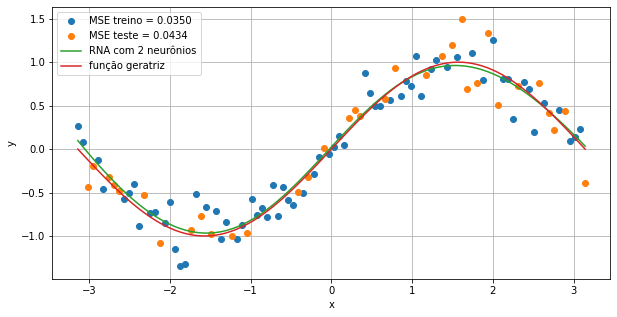

In [ ]:
# visualização da predição
x_grid = np.linspace(-np.pi, np.pi, 100).reshape(-1, 1)  # aumenta a resolução
y_pred_grid = mlp.predict(x_grid) 
plt.figure(figsize=(10, 5))
plt.plot(X_train[:, 0], y_train, 'o',
         label='MSE treino = {:.4f}'.format(mse_train))
plt.plot(X_test[:, 0], y_test, 'o',
         label='MSE teste = {:.4f}'.format(mse_test))
plt.plot(x_grid, y_pred_grid, label=f'RNA com {n} neurônios')
plt.plot(x_grid, np.sin(x_grid), label='função geratriz')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

### Calibração de hiperparâmetros

In [ ]:
vamos escolher os melhores parametros

In [ ]:
# erros de treino e teste para diversos valores n (numeros de neuronios na camada escondida)  para apenas 1 parametro
n_grid = np.arange(1, 9, 1)
train_error = []
test_error = []
for n in n_grid:
  # instanciando a rede
  mlp = MLPRegressor(hidden_layer_sizes=(n,),
                     activation='tanh',
                     solver='lbfgs',
                     max_iter=1000)

  # fit no modelo
  mlp.fit(X_train, y_train.ravel())

  # predição no treino/teste
  y_pred = mlp.predict(X_test)
  y_pred_train = mlp.predict(X_train)

  # MSE treino/teste
  train_error.append(mean_squared_error(y_true=y_train, y_pred=y_pred_train))
  test_error.append(mean_squared_error(y_true=y_test, y_pred=y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


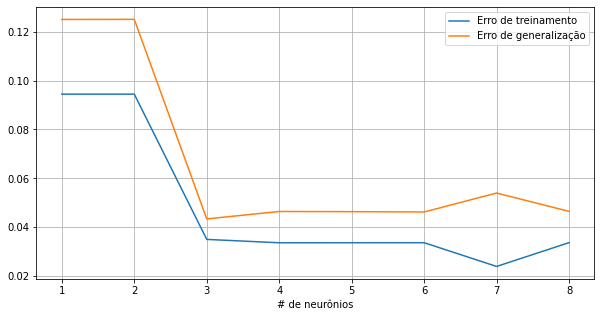

In [ ]:
# plot
plt.figure(figsize=(10, 5))
plt.plot(n_grid, train_error, label='Erro de treinamento')
plt.plot(n_grid, test_error, label='Erro de generalização')
plt.legend()
plt.xlabel('# de neurônios')
plt.grid()
plt.show()

Onde a curva começa a ficar estavel é o numero ideal

In [ ]:
# grid search e K-Fold Cross-Validation  para calibrar varios parametros  utiliza validação cruzada e testa melhores combinação de hiperparametros
from sklearn.model_selection import GridSearchCV

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width=600 height=500 />


In [ ]:
# parâmetros  aqui estamos testanto as opções de parametros 
parameters = {'hidden_layer_sizes': [(2,), (4,), (8,)],
              'activation':['tanh', 'relu'],
              'solver': ['lbfgs'],
              'max_iter': [1000]}

In [ ]:
# escolha de hiperparâmetros
mlp_grid = GridSearchCV(estimator=mlp,
                        param_grid=parameters,
                        cv=5)    # cv é numero de partições para treino e teste

In [ ]:
# grid search
mlp_grid.fit(X_train, y_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPRegressor(activation='tanh', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(8,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=1000, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=None, shuffle=True,
                                    solver='lbfgs', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activation'

In [ ]:
# melhores parâmetros 
mlp_grid.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': (2,),
 'max_iter': 1000,
 'solver': 'lbfgs'}

In [ ]:
# predições com melhor modelo
y_pred_best = mlp_grid.best_estimator_.predict(X_test)